170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


<ipython-input-1-58d063ef02c9>:37: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 70ms/step - accuracy: 0.2390 - loss: 2.0692 - val_accuracy: 0.2999 - val_loss: 1.9139
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 130s 62ms/step - accuracy: 0.2810 - loss: 1.9631 - val_accuracy: 0.3096 - val_loss: 1.9042
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 62ms/step - accuracy: 0.2947 - loss: 1.9399 - val_accuracy: 0.3213 - val_loss: 1.8658
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 61ms/step - accuracy: 0.2989 - loss: 1.9260 - val_accuracy: 0.3323 - val_loss: 1.8453
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.3035 - loss: 1.9116 - val_accuracy: 0.3391 - val_loss: 1.8417
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 62ms/step - accuracy: 0.3016 - loss: 1.9111 - val_accuracy: 0.3369 - val_loss: 1.8344
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 63ms/step - accuracy: 0.3089 - loss: 1.9010 - val_accuracy: 0.3381 - val_loss: 1.8339
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 62ms/step - accuracy: 0.3088 - loss

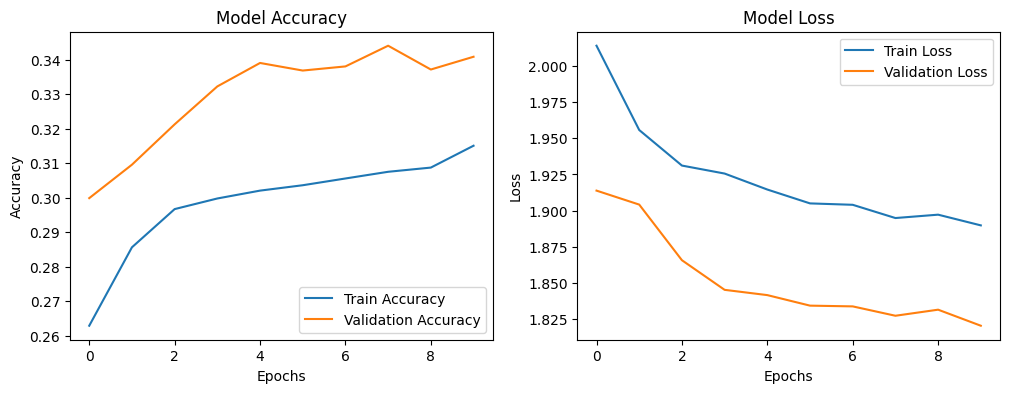

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_datagen.fit(x_train)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_datagen.flow(x_train, y_train, batch_size=32),
                    epochs=10,
                    validation_data=(x_test, y_test))

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

report = classification_report(true_classes, predicted_classes)
conf_matrix = confusion_matrix(true_classes, predicted_classes)

print(report)
print(conf_matrix)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
